In [55]:
import pickle
from canny_cf import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
k = 10 # number of latent factors
FNAME = 'data/LasVegas_local.pck'

with open(FNAME, 'rb') as pickle_file:
    Ycol = pickle.load(pickle_file)

# Y is a pandas dataframe array with d0 = users and d1 = businesses
# columns are axis 0 in df

    

n=107
m=2846
k=10
Starting Iterations
iter: 0 	lam_diff:  31.9443	psi_diff:  0.7309
iter: 1 	lam_diff:  6.7005	psi_diff:  14.8460
iter: 2 	lam_diff:  6.8908	psi_diff:  12.7775
iter: 3 	lam_diff:  2.9141	psi_diff:  13.5082
iter: 4 	lam_diff:  2.7850	psi_diff:  9.1494
iter: 5 	lam_diff:  1.0687	psi_diff:  7.2081
iter: 6 	lam_diff:  0.8036	psi_diff:  4.2341
iter: 7 	lam_diff:  0.4334	psi_diff:  3.2503
iter: 8 	lam_diff:  0.3457	psi_diff:  1.5237
iter: 9 	lam_diff:  0.1465	psi_diff:  1.2949
iter: 10 	lam_diff:  0.1357	psi_diff:  0.3633
iter: 11 	lam_diff:  0.0572	psi_diff:  0.5095
iter: 12 	lam_diff:  0.0675	psi_diff:  0.0164
iter: 13 	lam_diff:  0.0446	psi_diff:  0.2365
iter: 14 	lam_diff:  0.0464	psi_diff:  0.1028
iter: 15 	lam_diff:  0.0393	psi_diff:  0.1429
iter: 16 	lam_diff:  0.0374	psi_diff:  0.1043
iter: 17 	lam_diff:  0.0341	psi_diff:  0.1036
iter: 18 	lam_diff:  0.0319	psi_diff:  0.0881
iter: 19 	lam_diff:  0.0296	psi_diff:  0.0807
iter: 20 	lam_diff:  0.0277	psi_diff:  0.0715
it

Text(0.5,1,'Difference between Successive Iterations')

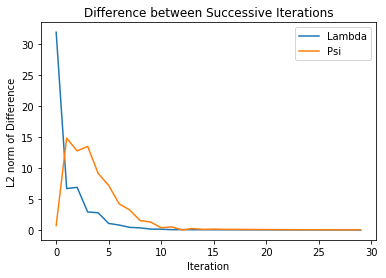

In [60]:
plt.plot(np.arange(iters), lam_diff, label='Lambda')
plt.plot(np.arange(iters), psi_diff, label="Psi")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('L2 norm of Difference')
plt.title('Difference between Successive Iterations')

(107, 10)